<a href="https://colab.research.google.com/github/JScottLopez/JScottLopez/blob/main/Lopez_J_DDS_8555v1_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Author: Joseph Lopez
#3/6/2025

#Install preliminary libraries
from sklearn import datasets
import pandas as pd
import numpy as np

#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from a CSV file
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Use one hot encoding to sub numerical values for categorical values
train = pd.get_dummies(train, columns=['Sex'], dtype=int)
test = pd.get_dummies(test, columns=['Sex'], dtype=int)

#Set output to satisfy submission requirements
target_train_size = 60411
if len(train) > target_train_size:
    train = train.sample(n=target_train_size, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

#Subset columns
X = train.drop('Rings', axis=1)
y = train['Rings']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

#Calculate coefficients and print
coef = pd.Series(lasso.coef_, index=X.columns)
print(coef)

id               -0.000000
Length            0.000000
Diameter          0.000000
Height            0.817765
Whole weight      0.000000
Whole weight.1   -1.345230
Whole weight.2   -0.000000
Shell weight      2.393533
Sex_F             0.000000
Sex_I            -0.301057
Sex_M             0.000000
dtype: float64


In [ ]:
#Specify top 5 features
top_n = 5
top_features = coef.abs().nlargest(top_n).index

#Subset data using only top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#Scale top features
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

#Refit Lasso model with top only features
lasso_top = Lasso(alpha=0.1)
lasso_top.fit(X_train_top_scaled, y_train)

#Make predictions
y_pred_top = lasso_top.predict(X_test_top_scaled)

#Calcualte MSE and R squared for model
mse_top = mean_squared_error(y_test, y_pred_top)
r2_top = r2_score(y_test, y_pred_top)
print(f'Mean Squared Error (Top 5 Features): {mse_top}')
print(f'R2 Score (Top 5 Features): {r2_top}')

Mean Squared Error (Top 5 Features): 4.251793180320714
R2 Score (Top 5 Features): 0.57702479529937


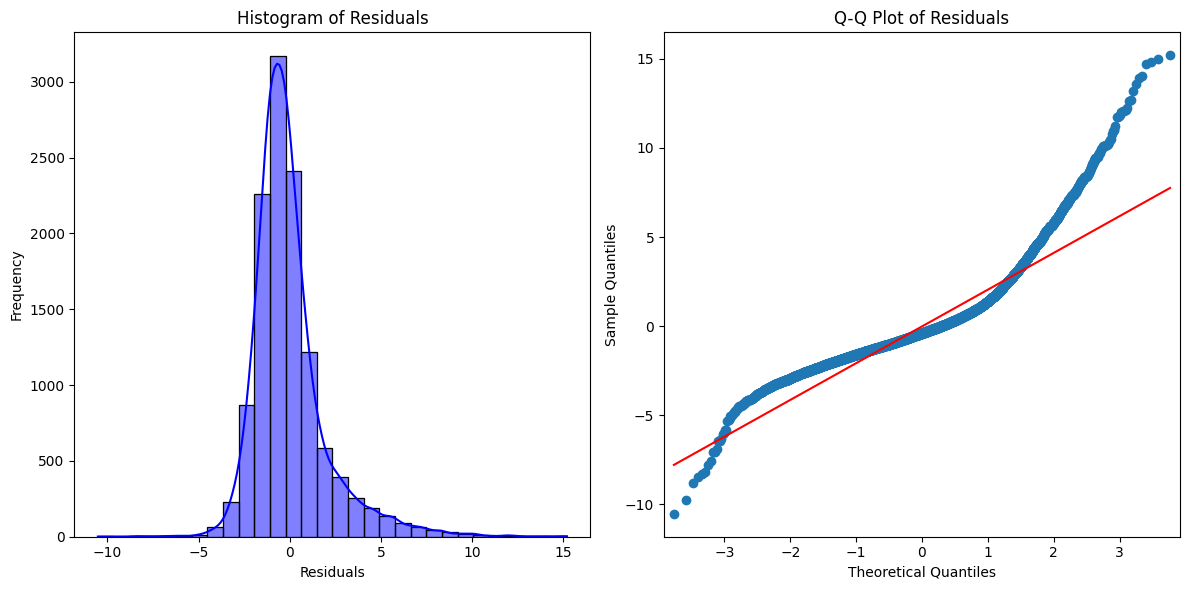

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate residuals
residuals = y_test - y_pred_top

#Generate histogram  and Q-Q plot for residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

In [ ]:
#Use lasso model
y_test_predict3 = lasso_top.predict(scaler.transform(test[top_features]))
submission3 = pd.DataFrame({'id':test['id'],'Rings':y_test_predict3})
print(submission3)

#Convert output to CSV files
submission3.to_csv('submission3.csv', index=False)

           id      Rings
0       90615   9.894289
1       90616  10.455437
2       90617  10.217348
3       90618  10.224493
4       90619   7.734611
...       ...        ...
60406  151021   6.734615
60407  151022   9.435670
60408  151023  10.101458
60409  151024  13.323749
60410  151025   8.342189

[60411 rows x 2 columns]


In [ ]:
#Ensure output meets submission requirements
target_size = 60411
if len(train) > target_size:
  train = train.sample(n=target_size, random_state=42)

#Subset columns for second model
A = train.drop('Rings', axis=1)
b = train['Rings']

#Scale data once again
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

In [ ]:
from sklearn.decomposition import PCA

#Initialize PCA function
pca = PCA()

#Fit model
A_pca = pca.fit_transform(A_scaled)

#Calculate explained variance ratio
exp_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", exp_variance)

Explained variance ratio: [0.6674909  0.1335584  0.09091118 0.06818774 0.01714117 0.01033866
 0.00644087 0.00403633 0.00098603 0.00090872 0.        ]


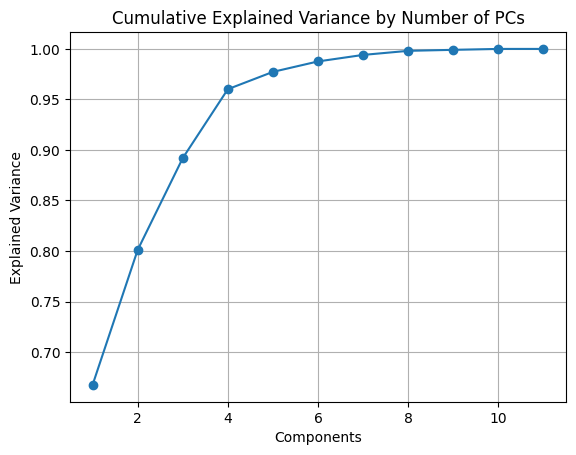

In [ ]:
#Plot explained variance
plt.plot(range(1, len(exp_variance) + 1), exp_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Number of PCs')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

#Set number of components
num_components = 8
A_pca_selected = A_pca[:, :num_components]

#Split data
A_train, A_test, b_train, b_test = train_test_split(A_pca_selected, b, test_size=0.2, random_state=42)

#Fit linear model
model = LinearRegression()
model.fit(A_train, b_train)

#Make predictions
b_pred = model.predict(A_test)

#Evaluate model
mse2 = mean_squared_error(b_test, b_pred)
r2_pca = r2_score(b_test, b_pred)
print("Mean Squared Error:", mse2)
print("R2 Score:", r2_pca)

Mean Squared Error: 4.004071533370728
R2 Score: 0.60166854203955


In [ ]:
#Use PCR model
A_test_pca= pca.transform(A_scaled)[:, :num_components]
y_test_predict4 = model.predict(A_test_pca)
submission4 = pd.DataFrame({'id':test['id'].iloc[:target_size], 'Rings': y_test_predict4[:target_size]})
print(submission4)

#Convert output to CSV files
submission4.to_csv('submission4.csv', index=False)

           id      Rings
0       90615   8.704896
1       90616   7.397144
2       90617  10.267030
3       90618  10.349297
4       90619  11.512081
...       ...        ...
60406  151021  13.036702
60407  151022   9.306361
60408  151023  11.725345
60409  151024  11.819502
60410  151025  10.643647

[60411 rows x 2 columns]
